In [2]:
# Step 1: Import libraries
import pandas as pd

# Step 2: Load the dataset
df = pd.read_csv("data.csv")

# Step 3: Show basic info
print("🔹 First 5 rows:")
print(df.head())

print("\n🔹 Dataset Info:")
print(df.info())

print("\n🔹 Unique values per column:")
print(df.nunique())

# Step 4: Target distribution
if 'label' in df.columns:
    print("\n🔹 Label distribution:")
    print(df['label'].value_counts())

# Step 5: Gender distribution
if 'gender' in df.columns:
    print("\n🔹 Gender distribution:")
    print(df['gender'].value_counts())

# Step 6: Missing values
print("\n🔹 Missing values:")
print(df.isnull().sum())


🔹 First 5 rows:
   Age  Gender  EducationLevel  ExperienceYears  PreviousCompanies  \
0   26       1               2                0                  3   
1   39       1               4               12                  3   
2   48       0               2                3                  2   
3   34       1               2                5                  2   
4   30       0               1                6                  1   

   DistanceFromCompany  InterviewScore  SkillScore  PersonalityScore  \
0            26.783828              48          78                91   
1            25.862694              35          68                80   
2             9.920805              20          67                13   
3             6.407751              36          27                70   
4            43.105343              23          52                85   

   RecruitmentStrategy  HiringDecision  
0                    1               1  
1                    2               1  
2      

# New Section

# New Section

In [3]:
# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 2: Load the dataset
df = pd.read_csv("data.csv")

# Step 3: Define features and target
X = df.drop(columns=['HiringDecision'])   # Features
y = df['HiringDecision']                  # Target

# Step 4: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Step 5: Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Step 7: Predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # probability of being 'Hired' (1)

# Step 8: Evaluation
print("🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔹 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

# Step 9: Save results for Fairness Analysis
test_gender = X_test['Gender'].reset_index(drop=True)
results_df = pd.DataFrame({
    'Gender': test_gender,
    'Actual': y_test.reset_index(drop=True),
    'Predicted': y_pred,
    'Probability': y_prob
})

# Display the first few rows of the result
results_df.head()


🔹 Accuracy: 0.8566666666666667

🔹 Confusion Matrix:
 [[192  15]
 [ 28  65]]

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       207
           1       0.81      0.70      0.75        93

    accuracy                           0.86       300
   macro avg       0.84      0.81      0.83       300
weighted avg       0.85      0.86      0.85       300



,Gender,Actual,Predicted,Probability
0,0,0,0,0.278072
1,0,1,0,0.021699
2,1,1,1,0.645349
3,0,0,0,0.102430
4,1,0,0,0.045242


from matplotlib import pyplot as plt
_df_0['Gender'].plot(kind='hist', bins=20, title='Gender')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Actual'].plot(kind='hist', bins=20, title='Actual')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Predicted'].plot(kind='hist', bins=20, title='Predicted')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Probability'].plot(kind='hist', bins=20, title='Probability')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Gender', y='Actual', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Actual', y='Predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Predicted', y='Probability', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Gender'].plot(kind='line', figsize=(8, 4), title='Gender')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Actual'].plot(kind='line', figsize=(8, 4), title='Actual')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Predicted'].plot(kind='line', figsize=(8, 4), title='Predicted')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Probability'].plot(kind='line', figsize=(8, 4), title='Probability')
plt.gca().spines[['top', 'right']].set_visible(False)

In [4]:
# Group by gender
group_0 = results_df[results_df['Gender'] == 0]  # Female
group_1 = results_df[results_df['Gender'] == 1]  # Male

# Demographic Parity = P(Hire | Gender = 0) vs P(Hire | Gender = 1)
dp_female = (group_0['Predicted'] == 1).mean()
dp_male = (group_1['Predicted'] == 1).mean()
demographic_parity_diff = abs(dp_female - dp_male)

print("🔹 Demographic Parity")
print(f"Hire Rate (Female): {dp_female:.3f}")
print(f"Hire Rate (Male):   {dp_male:.3f}")
print(f"Difference:         {demographic_parity_diff:.3f}")

# Equal Opportunity = TPR (recall) for each group
# True Positive = Actual == 1 and Predicted == 1
# Positive = Actual == 1

def compute_tpr(group):
    true_positive = ((group['Actual'] == 1) & (group['Predicted'] == 1)).sum()
    actual_positive = (group['Actual'] == 1).sum()
    return true_positive / actual_positive if actual_positive > 0 else 0

tpr_female = compute_tpr(group_0)
tpr_male = compute_tpr(group_1)
equal_opportunity_diff = abs(tpr_female - tpr_male)

print("\n🔹 Equal Opportunity")
print(f"TPR (Female): {tpr_female:.3f}")
print(f"TPR (Male):   {tpr_male:.3f}")
print(f"Difference:   {equal_opportunity_diff:.3f}")

# Average Odds Difference = average of (TPR_diff + FPR_diff)
def compute_fpr(group):
    false_positive = ((group['Actual'] == 0) & (group['Predicted'] == 1)).sum()
    actual_negative = (group['Actual'] == 0).sum()
    return false_positive / actual_negative if actual_negative > 0 else 0

fpr_female = compute_fpr(group_0)
fpr_male = compute_fpr(group_1)
fpr_diff = abs(fpr_female - fpr_male)
avg_odds_diff = 0.5 * (equal_opportunity_diff + fpr_diff)

print("\n🔹 Average Odds Difference")
print(f"FPR (Female): {fpr_female:.3f}")
print(f"FPR (Male):   {fpr_male:.3f}")
print(f"FPR Diff:     {fpr_diff:.3f}")
print(f"Average Odds Difference: {avg_odds_diff:.3f}")


🔹 Demographic Parity
Hire Rate (Female): 0.222
Hire Rate (Male):   0.308
Difference:         0.085

🔹 Equal Opportunity
TPR (Female): 0.625
TPR (Male):   0.755
Difference:   0.130

🔹 Average Odds Difference
FPR (Female): 0.067
FPR (Male):   0.078
FPR Diff:     0.010
Average Odds Difference: 0.070


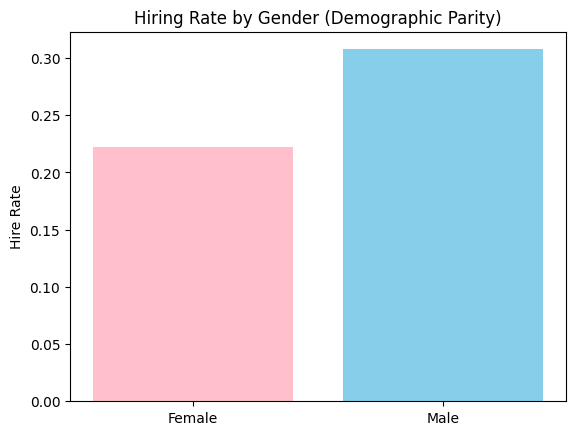

In [7]:
import matplotlib.pyplot as plt

groups = ['Female', 'Male']
hire_rates = [dp_female, dp_male]

plt.bar(groups, hire_rates, color=['pink', 'skyblue'])
plt.title("Hiring Rate by Gender (Demographic Parity)")
plt.ylabel("Hire Rate")
plt.show()



🔍 Explanation for Sample Index: 2 (Predicted: 1)


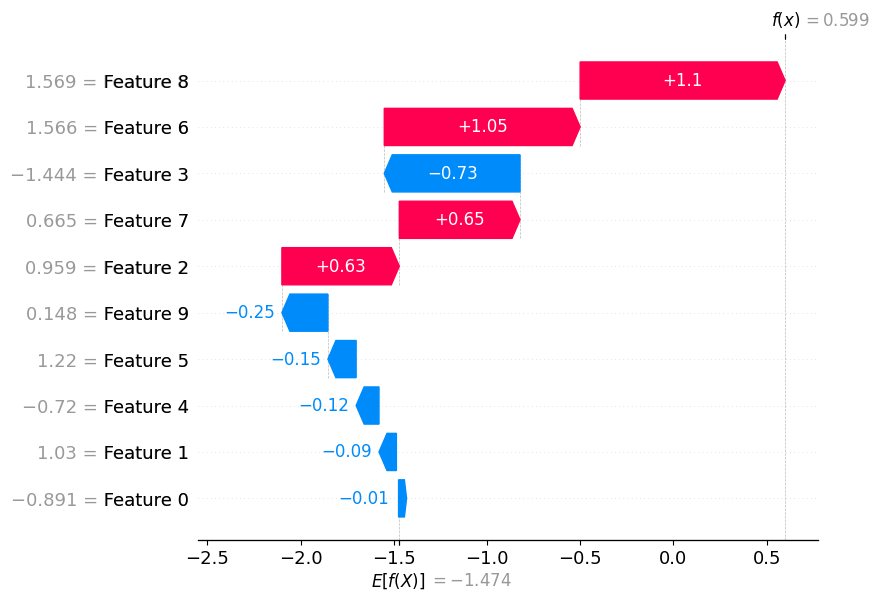


🔍 Explanation for Sample Index: 5 (Predicted: 1)


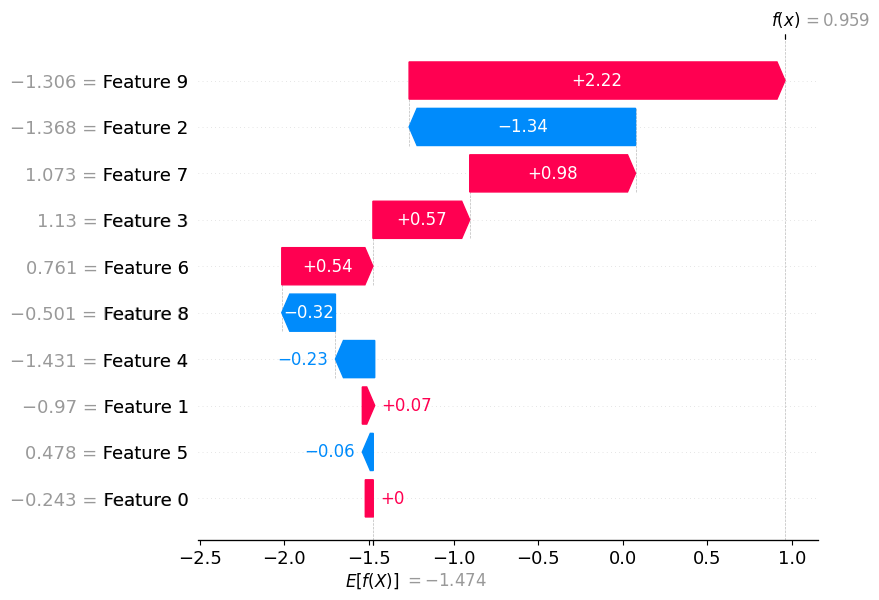


🔍 Explanation for Sample Index: 7 (Predicted: 1)


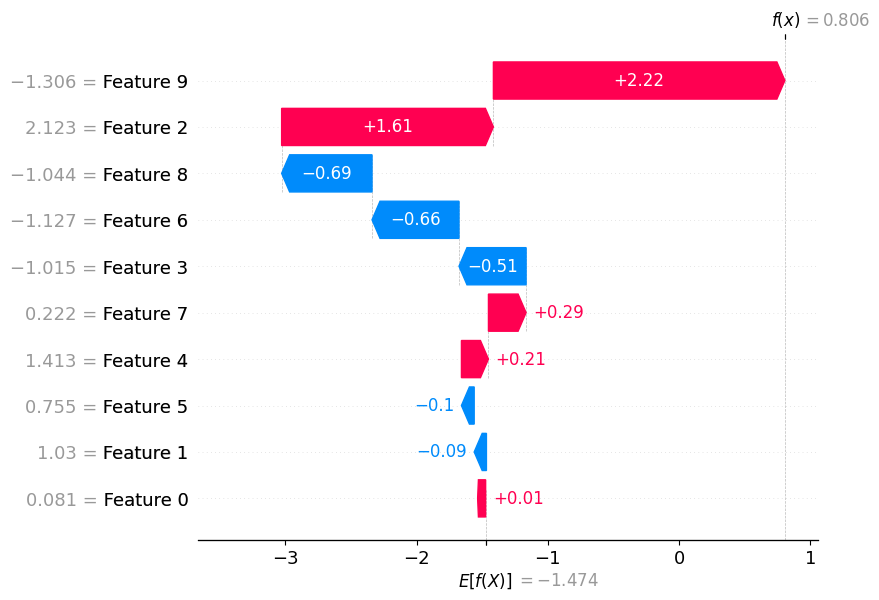


🔍 Explanation for Sample Index: 0 (Predicted: 0)


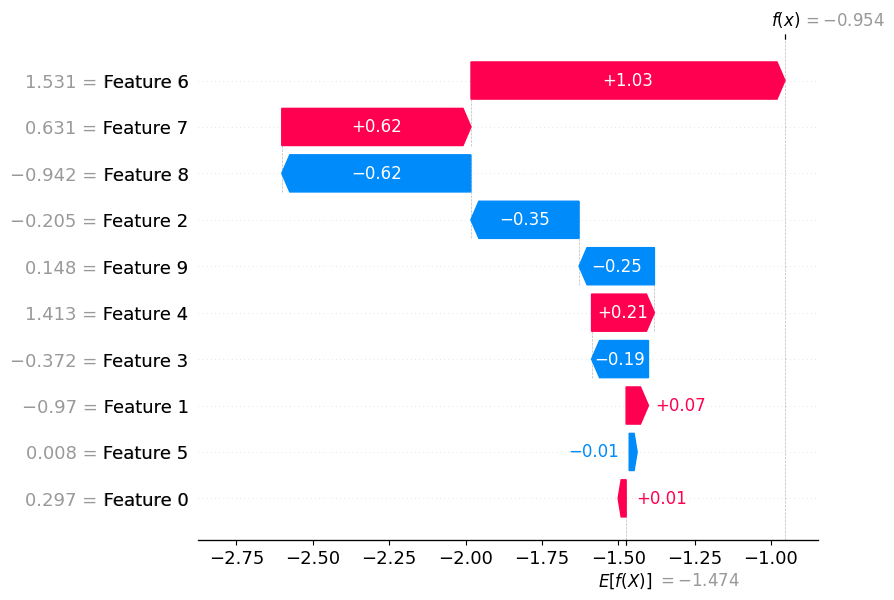


🔍 Explanation for Sample Index: 1 (Predicted: 0)


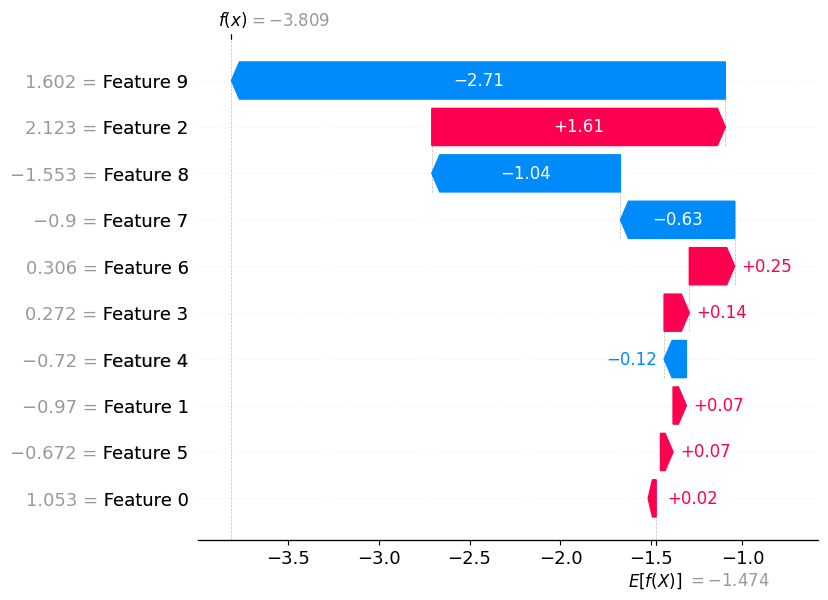

In [8]:
import shap

# Use KernelExplainer for logistic regression
explainer = shap.Explainer(model, X_test_scaled)
shap_values = explainer(X_test_scaled)

# Convert X_test to DataFrame after scaling
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Pick 3 "Hired" and 2 "Not Hired" cases
hired_indices = results_df[results_df['Predicted'] == 1].index[:3]
not_hired_indices = results_df[results_df['Predicted'] == 0].index[:2]
selected_indices = list(hired_indices) + list(not_hired_indices)

# Plot explanations
for idx in selected_indices:
    print(f"\n🔍 Explanation for Sample Index: {idx} (Predicted: {results_df.loc[idx, 'Predicted']})")
    shap.plots.waterfall(shap_values[idx], max_display=10)


In [9]:
# Step 1: Create counterfactuals by flipping gender
cf_data = X.copy()
cf_data['Gender'] = 1 - cf_data['Gender']  # Flip 0 <-> 1
cf_data['HiringDecision'] = y.values       # Copy original labels

# Combine original + counterfactual data
augmented_df = pd.concat([df, cf_data], ignore_index=True)
augmented_X = augmented_df.drop(columns=['HiringDecision'])
augmented_y = augmented_df['HiringDecision']

print("✅ Original samples:", len(df))
print("✅ Augmented samples:", len(augmented_df))


✅ Original samples: 1500
✅ Augmented samples: 3000


In [12]:
# Train/Test Split for augmented data
X_train_aug, X_test_aug, y_train_aug, y_test_aug = train_test_split(
    augmented_X, augmented_y, test_size=0.2, stratify=augmented_y, random_state=42)

# Normalize
X_train_aug_scaled = scaler.fit_transform(X_train_aug)
X_test_aug_scaled = scaler.transform(X_test_aug)

# Retrain the model
model_aug = LogisticRegression()
model_aug.fit(X_train_aug_scaled, y_train_aug)

# Predict
y_pred_aug = model_aug.predict(X_test_aug_scaled)
y_prob_aug = model_aug.predict_proba(X_test_aug_scaled)[:, 1]

# Evaluate
print("🔁 Accuracy after Counterfactual Augmentation:", accuracy_score(y_test_aug, y_pred_aug))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_aug, y_pred_aug))
print("\nClassification Report:\n", classification_report(y_test_aug, y_pred_aug))


🔁 Accuracy after Counterfactual Augmentation: 0.855

Confusion Matrix:
 [[386  28]
 [ 59 127]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       414
           1       0.82      0.68      0.74       186

    accuracy                           0.85       600
   macro avg       0.84      0.81      0.82       600
weighted avg       0.85      0.85      0.85       600

